### Import

In [43]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import requests
import urllib.request

import time

import joblib
from PIL import Image
import matplotlib.pyplot as plt

import re

from tqdm import tqdm

import glob

In [6]:
import warnings
warnings.filterwarnings("ignore") # 불필요한 Warning 메시지를 꺼줍니다.

options = Options()
options.headless = True

### Load Game Data

In [7]:
game_df = joblib.load('game_pkl/best_games_150.pkl')

### Create Webdriver

In [95]:
service = Service(executable_path=ChromeDriverManager().install()) 

driver = webdriver.Chrome(service=service, options=options)
# driver = webdriver.Chrome(service=service)

driver.maximize_window()



====== WebDriver manager ======
Current google-chrome version is 104.0.5112
Get LATEST chromedriver version for 104.0.5112 google-chrome
Driver [C:\Users\piakp\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache


### Test Scraping

Plan A. 일단 스크랩한 게임 제목과 플랫폼을 통해 url을 만들어 페이지로 이동, 이미지를 찾아 저장

In [56]:
url_pattern = re.compile(r'[A-Za-z0-9]+')

In [39]:
driver.get(f"https://www.metacritic.com/game/{'-'.join(re.findall(url_pattern, game_df.at[0, 'platform'])).lower()}/{'-'.join(re.findall(url_pattern, game_df.at[0, 'title'])).lower()}")

time.sleep(3)

In [ ]:
tmp_img_src = driver.find_element(By.CSS_SELECTOR, 'img.product_image.large_image').get_attribute('src')
tmp_img_src

플랜 A가 성공했으니 이미지 출력 & 저장

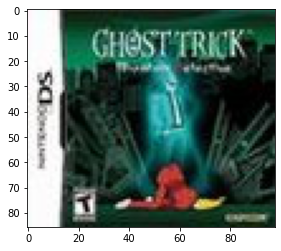

In [35]:
urllib.request.urlretrieve(
  tmp_img_src,
   "test.png")
  
img = Image.open("test.png")
# img.show()
plt.imshow(img)

time.sleep(3)

### Image Scraping

In [92]:
url_pattern = re.compile(r'[A-Za-z0-9\-]+')

In [118]:
missing_list = []

for row in tqdm(game_df.itertuples(), total=game_df.shape[0]):
    
    # 페이지 이동
    driver.get('https://www.metacritic.com/game/{}/{}'.format("-".join(re.findall(url_pattern, row[1])).lower(), "-".join(re.findall(url_pattern, row[2].replace(".",""). replace("\'",""))).lower()))
    
    time.sleep(3)
    
    try:
        # 이미지 주소 수집
        img_src = driver.find_element(By.CSS_SELECTOR, 'img.product_image.large_image').get_attribute('src')
    
        # 이미지 저장
        urllib.request.urlretrieve(img_src, f"GameImage/{row[0]}.png")
    
        time.sleep(3)
        
    except:
        # 아직도 처리가 안 된다면?
        missing_list.append(row[0])
        
        continue

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:38<00:00,  8.95s/it]


In [119]:
missing_list

[]

### Close Webdriver

In [94]:
driver.close()
driver.quit()